# Chapter 7: Advanced examples of Bayesian stats. 

Suggested topics: 
    - Bayesian Billiards game 
    - Rejecting outliers with MCMC 
Idea: create simulation of BB

## Bayesian Billiards
A famous thought experiment comparing the Bayesian and frequentist approach is 'Bayesian billiards'.

Suppose we have a rectangular billiard table with length $L$. We throw one black ball on the table, which will move around until it stops, at a random $x$-coordinate of the table, and call this $z$, $0\leq z\leq L$. For the purposes of this thought experiment, suppose we don't know $z$, and want to estimate it. We could do this by throwing $n$ white balls onto the table, and seeing whether they end up to the left, or to the right of the black ball. By counting how many are to each side, we can reasonably 'guess' the value of $z$. To make the calculation easier, suppose $L=1$. 

Note that one white ball is to the left of the black one with probability $z$, and to the right with probability $1-z$. The random variable 
$$
X_i=
\begin{cases}
1 &\text{ if ball $i$ is to the left}\\
0 &\text{if ball $i$ is to the right}
\end{cases}
$$
is then a Bernoulli random variable with parameter $z$. 
The probability density is $f(X_i|Z=z)=(1-z)^{1-X_i}+z^{X_i}$. 
The observations $X_1,\ldots,X_n$ are an i.i.d. sample, and the log-likelihood is
$$\ell(z)
=
\log(1-z)\left(n-\sum_{i=1}^n X_i\right)
+\log(z)\sum_{i=1}^nX_i .
$$
Setting the derivative of the log-likelihood equal to 0 gives
$$
\frac{\text{d}\ell(z)}{\text{d}z}
=
-\frac{n-\sum_{i=1}^n X_i}{1-z}(1-z)
+
\frac{\sum_{i=1}^n X_i}{z}
=
0,
$$
which gives us the following the frequentist MLE:
$$
\hat z_{\text{MLE}}
=
\frac{\sum_{i=1}^n X_i}{n}=\overline{X}.
$$
So if exactly half of the $n$ white balls lie to the right, the estimate is 
$\hat z_{\text{MLE}}=1/2,$
which is to be expected. 
But if all of the balls lie to the right, the estimate becomes $\hat z_{\text{MLE}}=0$, which means that the black ball would lie on the left edge.
Intuitively, however, we expect the ball to lie a little to the side, depending on $n$. 

Now consider the Bayesian framework. 
The black ball has an equal chance of being at each part of the table, so the prior of $Z$ is the uniform distribution between 0 and 1, which means $\pi(z)=1$ for all $0\leq z\leq1$. 
The posterior distribution is then
$$
f(z|X_1,\ldots,X_n )
\propto
f(X_1,\ldots,X_n|Z=z)
\pi(z)
=z^y(1-z)^{n-y},
$$
where $y=\sum_{i=1}^n X_i$ is the total number of balls that ended up on the left.

This can be recognized as a $\text{Beta}(y +1, n-y +1)$ distribution. 
From theory, we know that a $\text{Beta}(\alpha,\beta)$ distribution has expectation $\alpha/(\alpha+\beta)$.
The MAP is therefore:
$$\hat z_{MAP}= \frac{\sum_{i=1}^n X_i+1}{n+2}.$$
The difference between the MAP and MLE estimators can best be illustrated by thinking about an example: suppose $n=4$ balls have been added to the table, and all of them ended up on the right, so $y=0$. 
The frequentist method would suggest $\hat z_{MLE}=0$, as discussed before. 
But the Bayesian method would give $\hat z_{MAP}=1/6$, a little from the edge.
To see how the estimators compare, let's simulate

In [1]:
#piece of code simulation Bayesian Billiards for different n, and comparing MAP and MLE


Conclusion about simulation (MAP works better in this case)

TODO:
- discus where difference comes from
- look for a better frequentist method

## Rejecting Outliers with Markov Chain Monte Carlo simulations

$\def\f{\frac} \def\L{\mathcal{L}}$
<b> I will check for spelling/correct wording/layout and stuff later :)</b>

When doing measurements of a certain physical relation, you would not expect that all points are within one standard deiviation of the theoretical relation. If you assume a big enough sample, we can assume a normal distribution (CLT) thus then the chance of getting a datapoint outside of the 1-$\sigma$ region is about $32$%, so you would expect about a third of the measurements to be (at least) 1-$\sigma$ away from the exact relation. However, as we go further and further away from the relation, we expect less and less datapoints there. One of these outliers, a datapoint very far away from the relation, can substantially impact the fit, because it can substatnially change the mean, for example. Hence, there is need to reduce the sensitivty of these outliers. We will do this by removing the outliers, since there is always a change on outliers. Outliers can have multiple causes, for example unmodeled experimental uncertainty or (rare) noice sources, for which aren't always able to account for. One process of removing outliers is by hand. However, as one could image, this is far from ideal, as it can be very subjective and hard to reproduce. 

Let us make a more systematic way of rejecting outliers. For simpliicity let us look at a straight line. Let $X_1, \dots, X_n$ be an independent and identically distributed sample, and let $a = (q_1, \dots, q_n)$ be a set op $n$ binary integers, where $q_i$ is $1$ if the $i$th datapoint is "good" and $q_i$ is $0$ if the $i$th datapoint is "bad"; an outlier. Furthermore, let $P_b$ be the prior probability that a datapoint is bad and let $(Y_b, V_b)$ be the mean and variance of the distribution of bad points. Finally, let $I$ be all other information. Note that these extra parameters will be latere marginalized out, we do not need to worry about the fact we have more datapoints than our "actual" datapoints. 

<b> Generative model: </b> a parameterized, quantitative description of statisciatcal procedure that could reasonably hace generated the dataset you have.

Let $p_g$ be the generative model for the "good" datapoints and $p_b$ be the generative model for the "bad" datapoints. $p$ is generaly given by: 
- $p$: the frequency distribution (eq 9)
$$
p(y_i | x_i, \sigma_{y_i}, m, b) = \f{1}{\sqrt{2\pi \sigma_{y_i}^2}} \exp\left(-\f{[y_i - Y_i]^2}{2\sigma^2_{y_i}}\right) ,
$$
where $Y_i$ is the oucome of the model. For example, for a linear model with slope $m$ and zeropoint $(x=0)$ $b$, there holds $Y_i = mx_i + b$. 

We look for the model that maximizes the probability of the observed data, given the model and other factors. Hence, we will calculate the likelihood. Let $\hat{\theta}$ be all the model parameters of the model. Then, we can see: 

$$
\L = p(X_1, \dots, X_n | \hat{\theta}, q_1, \dots, q_n, Y_b, V_b, I)
$$

$$
\L = \prod_{i=1}^n p(X_i | \hat{\theta}, q_i, n, Y_b, V_b, I)
$$

(since the $X_i$ are iid)

$$
\mathcal{L} = \prod_{i = 1}^n  \left[p_g(X_1, \dots X_n | \hat{\theta}, I)\right]^{q_i} \left[p_b(X_1, \dots X_n | Y_b, V_b, I)\right]^{1-q_i} 
$$

As we can see that for good datapoints, $q_i = 1$, thus the second term will be unity, and for bad datapoints $q_i = 0$ so the first term will equal 1.

$$
%\mathcal{L} = \prod_{i = 1}^n  \left[ \frac{1}{\sqrt{2\pi \left[V_b + \sigma^2_{X_i}\right]}} \exp \left(-\frac{[X_i - my_i - b]^2}{2\sigma_{X_i}^2} \right)\right]^{q_i}  \cdot  \left[ \frac{1}{\sqrt{2\pi \left[V_b + \sigma^2_{X_i}\right]}} \exp\left(-\frac{[X_i - Y_b]^2}{2[V_b + \sigma_{X_i}^2]}\right)\right]^{1-q_i}
$$

Now, as we permit the rejection of some of our data, we must make a prior probabily on our values of $q_i$ that penelized each rejection, as otherwise we keep rejecting.... 

$$ 
p (\hat{\theta}, \{q_i\}^n_{i=1}, P_b, Y_b, V_b | I) = p(\{q_i\}^n_{i=1} | P_b, I) p (\hat{\theta}, P_b, Y_b, V_b | I) 
$$
with 
$$ 
p(\{q_i\}^n_{i=1} | P_b, I) = \prod_{i=1}^n [1-P_b]^{q_i} P_b^{[1-q_i]}
$$
the binomial probabiltiy of the particular sequanece $\{q_i\}^n_{i=1}$. 

The prior on the parameters $(P_b, Y_b, V_b)$ should be made without looking at the data. You can either set the prior based on prior knowlege or let the prior be somewhat uninformative, for example $P_b \in [0,1]$. By this, we have (a bit implicityly?) made the assumption that all datapoints are equally likely to be bad, which might not always be the case. However, most of the time you don't know enough about the quality of your data to assume anything better. 

-----------------------------
"The fact that the prior probabilities Pb are all set equal, however, does not mean that the posterior probabilities that individual points are bad will be at all similar. Indeed, this model permits an objective ranking (and hence public embarassment) of different contributions to any data set." ???????????

We have used a normal distribution (Gaussian) for the bad points. Since we don't know much about the bad points, this will be wrong. But, .... " But the power of this and the methods to follow comes not from making an accurate model of the outliers, it comes
simply from modeling them. If you have an accurate or substantiated model for your bad data, use it by all means. If you don’t, because the Gaussian is the maximum-entropy distribution described by a mean and a variance, it is—in some sense—the least restrictive assumption, given that we have allowed that mean and variance to vary in the fitting (and, indeed, we will marginalize over both in the end)." 

-----------------------

In general, the posterior probability distribution function is the likelihood times the prior, and then normalized.  

Then, integrating over $P_b, Y_b, V_b$ and our $\{q_i\}$ gives us the probability om the model parameters: 

$$
p(m, b | \{y_i\}^N_{i=1}, I) = \int d\{q_i\}_{i=1}^N \; dP_b \; dY_b \; dV_b \; p(\theta, I),
$$

$\theta = $.............. . 



- mixture model








- p. 11 Hoggs et al: "the marginalization will require that we have a measure on our parameters (integrals require measures) and that measure is provided by a prior." -> marginalization requires Bayesian stats


##### used sources:

Data analysis recipes: Fitting a model to data, Hogg et al, 2011 (from BS), chapter 3


##### possible sources: 

https://www.astroml.org/book_figures/chapter8/fig_outlier_rejection.html 

https://www.stat.cmu.edu/technometrics/59-69/VOL-02-02/v0202123.pdf

https://d-nb.info/1221556185/34



### Sigma Clipping

Sigma clipping is a commonly used method to reject outliers within astronomy. Data that is more than a certain number of standard deviations away from the sample's mean is rejected and removed from the sample, assuming the sample is distributed normally otherwise.

This method can be applied iteratively on a sample of data to remove unwanted data points, a simple example of how this is done can be seen in the code below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

(3, 400) object


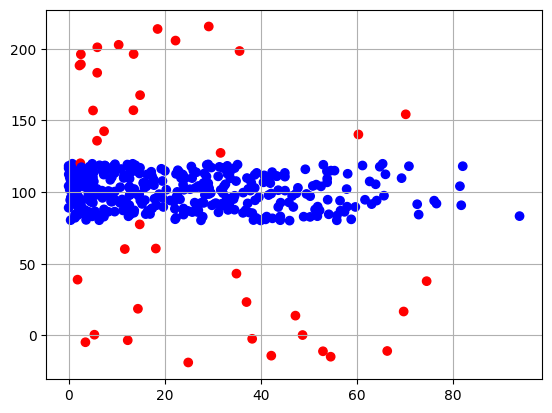

In [3]:
#Generate data points where the outliers are indicated by the colour red
def generate(median=100, err=20, outlier_err=100, size=360, outlier_size=20):
    errs = err * np.random.rand(size) * np.random.choice((-1, 1), size) #offset of the median
    data_c = np.full((size,), "b") #Assign the colour blue to the data
    data = np.vstack((np.array(median + errs), data_c), dtype=object) #data generated by combining the median + the offset

    err_c = np.full((outlier_size,), "r") #Assign the colour red to outliers
    lower_errs = outlier_err * np.random.rand(outlier_size) #The offset of the median for lower errors
    lower_outliers = np.vstack((np.array(median - err - lower_errs), err_c), dtype=object) #The data points of the lower_outliers

    upper_errs = outlier_err * np.random.rand(outlier_size) #The offset of the median for upper errors
    upper_outliers = np.vstack((np.array(median + err + upper_errs), err_c), dtype=object) #The data points of the upper_outliers

    data = np.concatenate((data, lower_outliers, upper_outliers),axis=1) #combine the actual data points and the outliers
    np.random.shuffle(data.T) #Shuffle the data by row

    x_value = np.random.rand(size+outlier_size*2) * np.random.randint(0,100,size=size+outlier_size*2) #generate random x-axis values
    data = np.vstack((x_value, data), dtype=object) #Append x-axis values to the data
    np.random.shuffle(data.T) #Shuffle the data by row again

    
    return data

data = generate()
print(data.shape, data.dtype)
plt.scatter(data[0,:],data[1,:],c=data[2,:])
plt.grid()

In [4]:
def sigmaclip(sample, nsigma=3.0, niter=100, plot_first_changes=2):
    med = np.median(sample[1,:])
    std = np.std(sample[1,:], ddof=1)
    isok = (np.abs(sample[1,:] - med) / std) < nsigma
    
    if (niter <= 0) or (isok.sum() == sample[1,:].size):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
        ax1.scatter(sample[0,:],sample[1,:],c=sample[2,:])
        ax2.scatter(sample[0,:],sample[1,:],c=sample[2,:])
        ax2.axhline(y = np.median(sample[1,:]) + 3*(np.abs(std)), color="g", linestyle="-")
        ax2.axhline(y = np.median(sample[1,:]) - 3*(np.abs(std)), color="g", linestyle="-")
        ax3.scatter(sample[0,:],sample[1,:],c=sample[2,:])
        ax1.title.set_text("Before")
        ax2.title.set_text("Decision Boundary")
        ax3.title.set_text("After")
        plt.show()      
        return sample

    if (plot_first_changes > 0):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
        ax1.scatter(sample[0,:],sample[1,:],c=sample[2,:])
        ax2.scatter(sample[0,:],sample[1,:],c=sample[2,:])
        ax2.axhline(y = np.median(sample[1,:]) + 3*(np.abs(std)), color="g", linestyle="-")
        ax2.axhline(y = np.median(sample[1,:]) - 3*(np.abs(std)), color="g", linestyle="-")
        ax3.scatter(sample[0,isok],sample[1,isok],c=sample[2,isok])
        ax1.title.set_text("Before")
        ax2.title.set_text("Decision Boundary")
        ax3.title.set_text("After")
        plt.show()
    
    return sigmaclip(sample[:,isok], nsigma, niter-1, plot_first_changes-1)

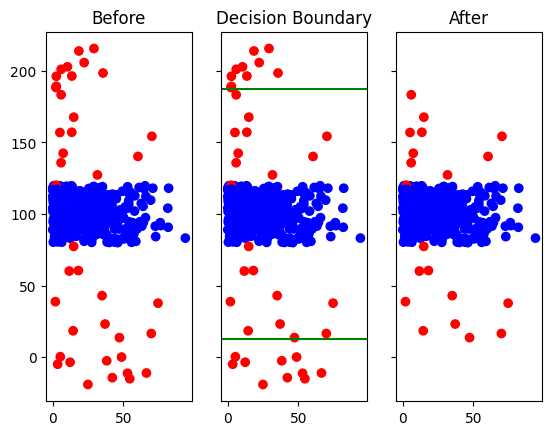

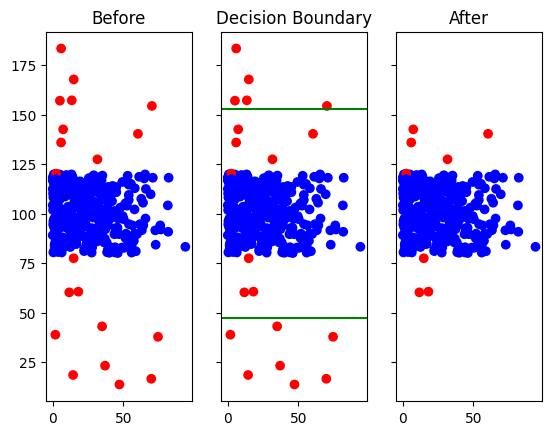

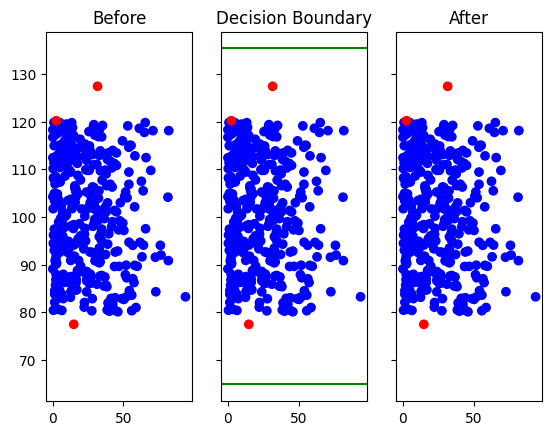

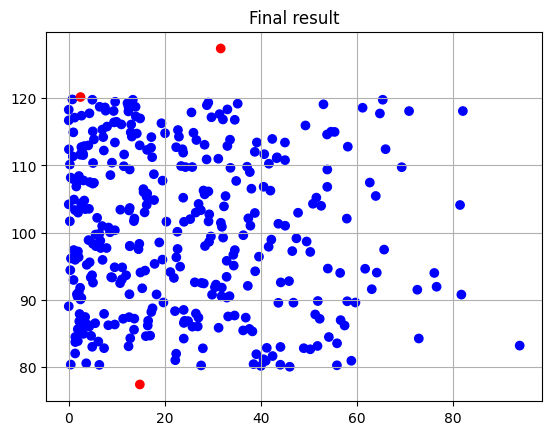

In [5]:
newdata = sigmaclip(data)

plt.scatter(newdata[0,:],newdata[1,:],c=newdata[2,:])
plt.title("Final result")
plt.grid()
plt.show()

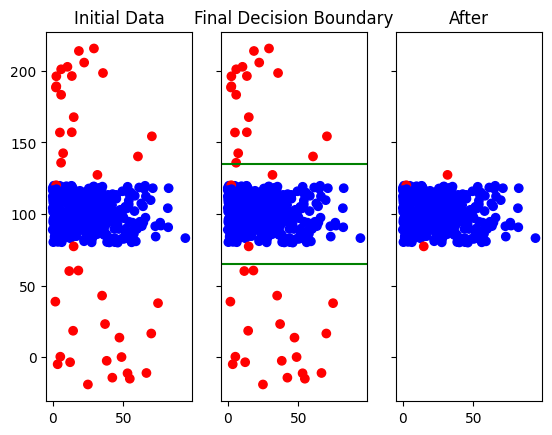

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

newdatasigma = np.std(newdata[1,:])
#print(newdatasigma)

ax1.scatter(data[0,:],data[1,:],c=data[2,:])
ax2.scatter(data[0,:],data[1,:],c=data[2,:])
ax2.axhline(y = np.median(newdata[1,:]) + 3*(np.abs(newdatasigma)), color="g", linestyle="-")
ax2.axhline(y = np.median(newdata[1,:]) - 3*(np.abs(newdatasigma)), color="g", linestyle="-")
ax3.scatter(newdata[0,:],newdata[1,:],c=newdata[2,:])
ax1.title.set_text("Initial Data")
ax2.title.set_text("Final Decision Boundary")
ax3.title.set_text("After")
plt.show()